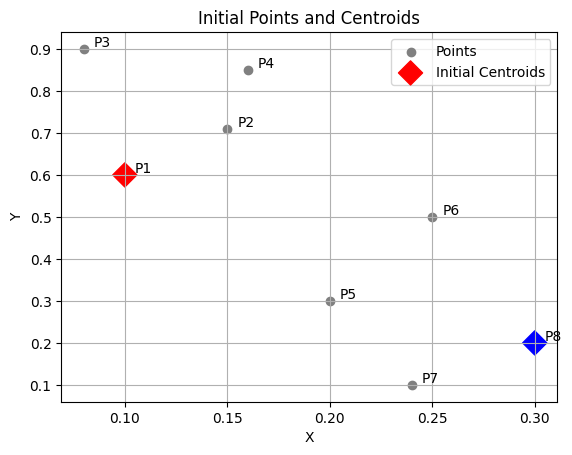

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cell 1: Initialize points + initial centroids
points = np.array([
    [0.1, 0.6],   # P1
    [0.15, 0.71], # P2
    [0.08, 0.9],  # P3
    [0.16, 0.85], # P4
    [0.2, 0.3],   # P5
    [0.25, 0.5],  # P6
    [0.24, 0.1],  # P7
    [0.3, 0.2]    # P8
])

centroids = np.array([
    [0.1, 0.6],   # m1 (P1)
    [0.3, 0.2]    # m2 (P8)
])

plt.scatter(points[:, 0], points[:, 1], c='gray', label='Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red', 'blue'], marker='D', s=150, label='Initial Centroids')
for idx, (x, y) in enumerate(points):
    plt.annotate(f'P{idx+1}', (x + 0.005, y + 0.005))
plt.title('Initial Points and Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


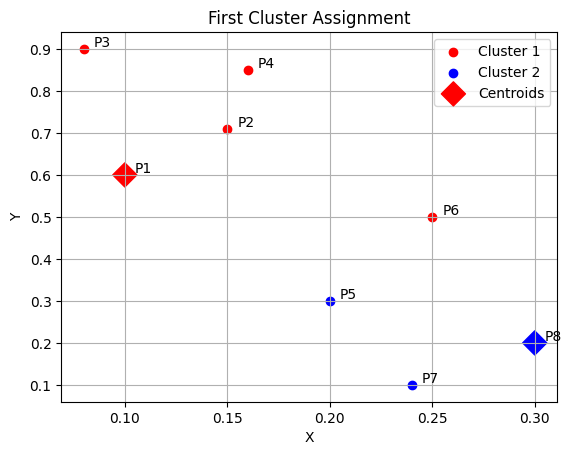

In [2]:
# Cell 2: Assign first clusters
colors = ['red', 'blue']
distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)
labels = np.argmin(distances, axis=1)

for i in range(2):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors, marker='D', s=150, label='Centroids')
for idx, (x, y) in enumerate(points):
    plt.annotate(f'P{idx+1}', (x + 0.005, y + 0.005))
plt.title('First Cluster Assignment')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


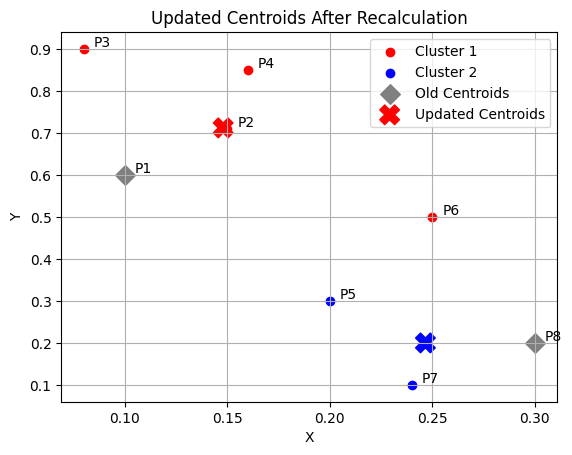

In [3]:
# Cell 3: Recalculate centroids
new_centroids = np.array([
    points[labels == i].mean(axis=0) for i in range(2)
])

for i in range(2):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='gray', marker='D', s=100, label='Old Centroids')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c=colors, marker='X', s=200, label='Updated Centroids')
for idx, (x, y) in enumerate(points):
    plt.annotate(f'P{idx+1}', (x + 0.005, y + 0.005))
plt.title('Updated Centroids After Recalculation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

centroids = new_centroids


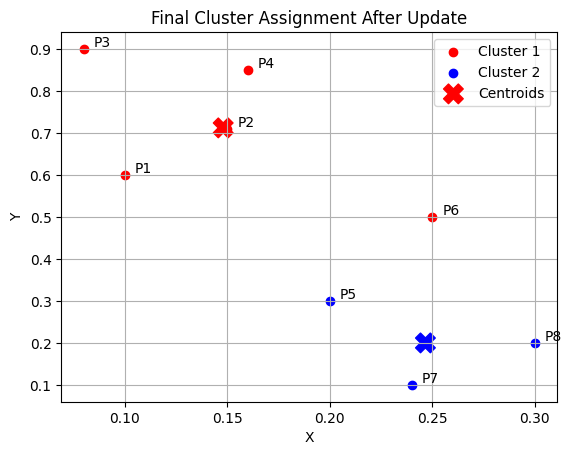

Clusters stabilized. No further updates needed.


In [4]:
# Cell 4: Reassign clusters
prev_labels = labels.copy()
distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)
labels = np.argmin(distances, axis=1)

for i in range(2):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors, marker='X', s=200, label='Centroids')
for idx, (x, y) in enumerate(points):
    plt.annotate(f'P{idx+1}', (x + 0.005, y + 0.005))
plt.title('Final Cluster Assignment After Update')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Check if clustering stabilized
if np.array_equal(labels, prev_labels):
    print("Clusters stabilized. No further updates needed.")
else:
    print("Clusters changed. You may run another iteration.")
